The second change Audacity is A/B testing is a more career focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

1. __Enrollment Rate:__ Click through rate for the Enroll button the course overview page
2. __Average Reading Duration:__ Average number of seconds spent on the course overview page
3. __Average Classroom Time:__ Average number of days spent in the classroom for students enrolled in the course
4. __Completion Rate:__ Course completion rate for students enrolled in the course

First, let's determine if the difference observed for each metric is statistically significant individually.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

df = pd.read_csv('course_page_actions.csv')
df.head(20)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
5,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
6,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
7,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
8,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
9,2016-09-24 21:08:22.790333,781883,experiment,enroll,204.322437


In [3]:
df.action.unique()

array(['view', 'enroll'], dtype=object)

In [4]:
#crate a new dataframe by extracting all the actions from the control group and give a new name
control_df = df.query('group == "control"')

In [20]:
#now find the Enrollment Rate by finding the number of uniqe users who enrolled
#devided by the number of unique users who viewed
control_ctr = control_df.query('action=="enroll"').count()[0]/control_df.query('action=="view"').count()[0]
control_ctr

0.23452157598499063

__Above gives us a Enrollment rate of 23% for control group.__

In [21]:
# Lets do the same for experiment group
experiment_df = df.query('group == "experiment"')

In [22]:
experiment_ctr = experiment_df.query('action=="enroll"').count()[0]/experiment_df.query('action=="view"').count()[0]
experiment_ctr

0.2642986152919928

__This gives us an experiment users Enrollment rate of almost 26%.__

In [23]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.02977703930700215

__From the above difference, with the given sample, we can find out that the experiment Enrollment rate is higher about 3% than the control group Enrollment rate.__

Now that we know the observed difference in this sample, we have to see if this difference is significant and not just due to chance.

__Lets bootsrap the sample to simulate the sampling distributin for difference in poroportion__

In [24]:
diffs = []
for _ in range(10000):
    boot_samp = df.sample(df.shape[0], replace = True)
    control_df = boot_samp.query('group == "control"')
    experiment_df = boot_samp.query('group == "experiment"')
    control_ctr = control_df.query('action=="enroll"').count()[0]/control_df.query('action=="view"').count()[0]
    experiment_ctr = experiment_df.query('action=="enroll"').count()[0]/experiment_df.query('action=="view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)

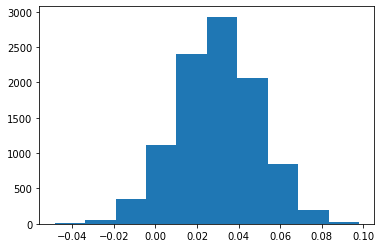

In [25]:
#lets take a look at our sampling distribution
plt.hist(diffs);

We can compute the pvalue for a statistic, which is the observed difference in proportion by  simulating the distribution under the null hypothesis. And then finding the probability that our statistice obtain from this distribution. To simulate from the null, we will create a normal distribution centered at 0 and with the same standard deviation as our sampling distribution we simulated as here. 

In [26]:
diffs = np.array(diffs)
null_vals = np.random.normal(0,np.std(diffs), diffs.size)

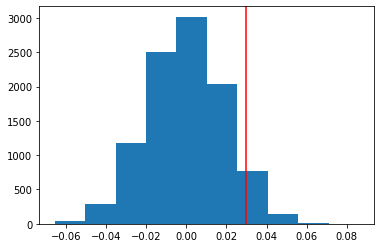

In [27]:
#lets have a look a the null distribution. and see where the obs diff false
plt.hist(null_vals);
plt.axvline(x=obs_diff, color = 'red')

In [28]:
(null_vals > obs_diff).mean()

0.0624

__Question:__ Do you have evidence, with a type I error rate of 0.05, that the enrollment rate for this course increases when using the experimental description on its overview page? 

pvalue > alpha so we failed to reject the null. Here our pvalue suggests there is no significant evidence that the experimental page has higher enrollment rate.

$$H_{0}: CTR_{new} - CTR_{old} \leq 0$$

$$H_{1}: CTR_{new} - CTR_{old} > 0$$